# Señales de tiempo continuo


## Señales estándar

Algunas [señales](https://en.wikipedia.org/wiki/Signal_%28electrical_engineering%29) desempeñan un rol importante en las aplicaciones del **procesamiento de señales** y se usan para caracterizar las propiedades de los sistemas Lineales e Invariantes en el Tiempo (LTI). A continuación se introducen e ilustran estas señales estándar.

### Exponencial compleja


La señal exponencial compleja en el dominio del tiempo $t$ se define matemáticamente con la [función exponencial compleja](https://en.wikipedia.org/wiki/Exponential_function#Complex_plane)

\begin{equation}
x(t) = e^{s t} 
\end{equation}

donde $s = \sigma + j \omega$ describe una frecuencia compleja con $\sigma, \omega \in \mathbb{R}$ y $j$ tal que $(j^2=-1)$.


Esta señal se usa para representar señales armónicas. Usando la [formula de Euler](https://es.wikipedia.org/wiki/F%C3%B3rmula_de_Euler), la expresión anterior se puede reescribir como:

\begin{equation}
x(t) = e^{(\sigma + j \omega) t}  = e^{(\sigma) t} \cdot e^{(j \omega) t} = e^{\sigma t} \cos(\omega t) + j e^{\sigma t} \sin(\omega t)
\end{equation}


Ahora, las partes real e imaginaria de la señal son ponderados por funciones conseno y seno de frecuencia $\omega = 2 \pi f$. Para $t>0$, el peso en función del tiempo  $e^{\sigma t}$ es

* exponencialmente decreciente si $\sigma < 0$,
* constante (1) si $\sigma = 0$,
* exponencialmente creciente si  $\sigma > 0$,

Así, la señal exponencial compleja se usa para modelar señales armónicas con amplitudes constantes o exponencialmente crecientes o decrecientes.

**Ejemplo**

[SymPy](http://docs.sympy.org/latest/index.html) es un módulo de Python que se usará para ejemplificar este timpo de señales. Con Sympy, se pueden trabajar variables y funciones simbólicas, a la vez que sus cálculos. 

Las variables que se requieren son $t$, $\omega$ and $\sigma$ y se definen como variables simbólicas reales.

In [1]:
import sympy as sym
%matplotlib inline
sym.init_printing()

t, sigma, omega = sym.symbols('t sigma omega', real=True)
s = sigma + 1j*omega
x = sym.exp(s*t)
x

Ahora se definen valores para $s = \sigma + j \omega$.

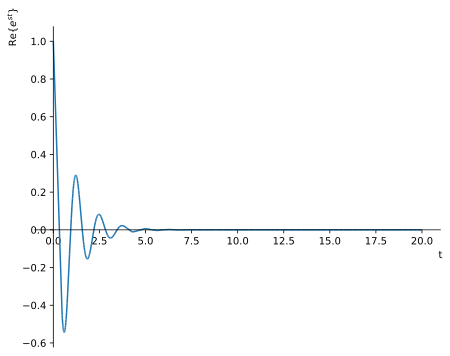

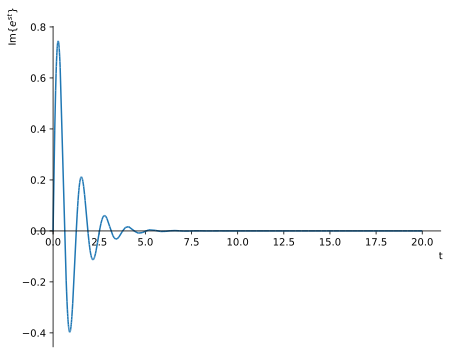

In [3]:
y = x.subs({omega: 5, sigma: -1})

sym.plot(sym.re(y), (t, 0, 20), ylabel=r'Re{$e^{st}$}')
sym.plot(sym.im(y), (t, 0, 20), ylabel=r'Im{$e^{st}$}')

**Ejercicio**

* Defina valores para `omega` y `sigma` de manera que pueda crear señales decrecientes, constantes y crecientes con distinta frecuencia angular.

In [4]:
## Escriba su código aquí



### Impulso de Dirac

Esta es una de las señales más importantes. Se usa para caracterizar y modelar los sistemas LTI. Se define según la [función delta de Dirac](https://es.wikipedia.org/wiki/Delta_de_Dirac). Se denota como $\delta(t)$ y se describe completamente por el efecto en otra función. A continuación las propiedades más relevantes:

1.  \begin{equation}
    \int_{-\infty}^{\infty} \delta(t) \cdot x(t) \cdot dt = x(0)
    \end{equation} donde $x(t)$ debe ser diferenciable en $t=0$. Esto implica que $\int_{-\infty}^{\infty} \delta(t) \cdot dt= 1$.
    

2.  \begin{equation}
    x(t) \cdot \delta(t) = x(0) \cdot \delta(t)
    \end{equation}
    donde $x(t)$ debe ser diferenciable en $t=0$.
    
    
3.  \begin{equation}
    a \cdot \delta(t) + b \cdot \delta(t) = (a+b) \cdot \delta(t)
    \end{equation}
    
    
4. \begin{equation}
    \delta(a t) = \frac{1}{|a|} \delta(t)
    \end{equation}
    donde $a \in \mathbb{R} \setminus 0$. Esto implica que el impulso de Dirac tiene simetría par.
    
    
5. \begin{equation}
    \int_{-\infty}^{\infty} \frac{d \delta(t)}{dt} \cdot x(t) \; dt = - \frac{d x(t)}{dt} \bigg\vert_{t = 0}
    \end{equation}

6.  \begin{equation}
    \int_{-\infty}^{\infty} \delta(\tau) \cdot x(t - \tau)  \, d\tau = x(t)
    \end{equation}
    
La última función es la [convolución](https://es.wikipedia.org/wiki/Convoluci%C3%B3n) y se tratará después en el curso.


**Ejemplo**

Primero se define la señal delta de Dirac.

In [5]:
delta = sym.DiracDelta(t)
delta

Observe la primera propiedad con una función arbitraria $f(t)$.

In [10]:
f = sym.Function('f')(t)
sym.integrate(delta*f, (t, -sym.oo, sym.oo))

**Ejercicio**

* Configure la función $\delta(t-\tau)$ y verifique el ejemplo anterior.

In [11]:
## Escriba su código aquí
tau = sym.symbols('tau', real=True)
deltaTau = sym.DiracDelta(t-tau)
deltaTau*f

In [12]:
sym.integrate(deltaTau*f, (t, -sym.oo, sym.oo))

### Escalón

La señal escalón se define según la [función escalón](https://es.wikipedia.org/wiki/Funci%C3%B3n_escal%C3%B3n_de_Heaviside)

\begin{equation}
\epsilon(t) = \begin{cases} 0 & t<0 \\  1 & t > 0 \end{cases}
\end{equation}

El escalón y el impulso de dirac se relacionan mediante:

\begin{equation}
\epsilon(t) = \int_{-\infty}^{t} \delta(\tau) \; d\tau
\end{equation}

**Ejemplo**

Se define y grafica la función escalón. `Sympy` llama Heaviside a la función y la denota como $\theta(t)$.

In [13]:
step = sym.Heaviside(t)
step

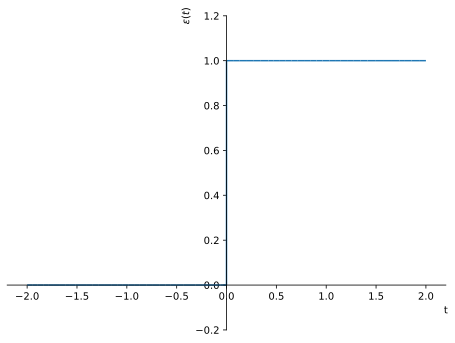

In [14]:
sym.plot(step, (t, -2, 2), ylim=[-0.2, 1.2], ylabel=r'$\epsilon(t)$');

**Ejercicio**

Construya una señal armónica $\cos(\omega t)$ con $\omega=2$ que se "enciende" en el instante $t=0$. 

\begin{equation}
x(t) = \cos(\omega t) \cdot \epsilon(t)
\end{equation}

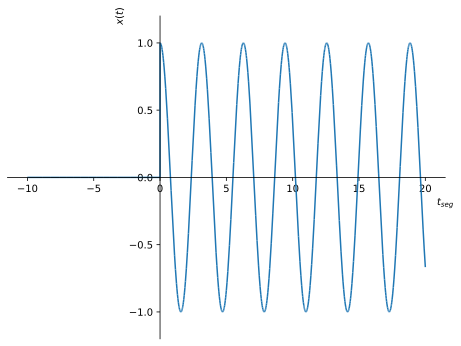

In [16]:
step = sym.Heaviside(t)
x = sym.cos(omega*t) * step
sym.plot(x.subs(omega,2), (t, -10, 20), ylim=[-1.2, 1.2], ylabel=r'$x(t)$',xlabel=r'$t_{seg}$')

**Ejemplo**

Basado en la función escalón, se define un pulso rectangular de ancho $a$.

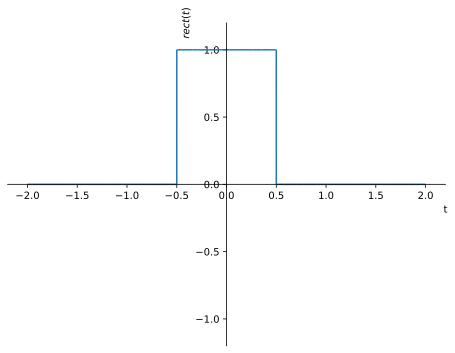

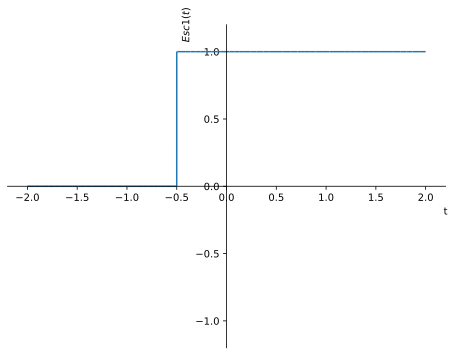

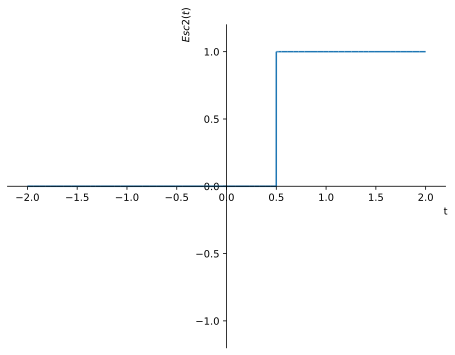

In [22]:
a = sym.symbols('a', real=True)
t = sym.symbols('t', real=True)

def rect(t,a):
    Esc1 = sym.Heaviside(t+a)
    Esc2 = sym.Heaviside(t-a)
    return Esc1 - Esc2

r = rect(t,a)
sym.plot(r.subs(a,0.5), (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'$rect(t)$')
sym.plot(sym.Heaviside(t+a).subs(a,0.5), (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'$Esc1(t)$')
sym.plot(sym.Heaviside(t-a).subs(a,0.5), (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'$Esc2(t)$')


**Ejercicio**

Defina y grafique una función armónica $\cos(\omega t)$ with $\omega=5$ que se "encienda" en $t=-1$ y se "apague" en $t=1$.

In [ ]:
## Escriba su código aquí


In [2]:
W = 5
Frec = W/(2*3.14)
Frec

0.7961783439490445